We generally start our code by importing the liberaries which we will use throughout the programs

In [1]:
import numpy as np
import pandas as pd
import sklearn

Now we will load the data that we will be using to train our model
Here we are using [Botsan Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [2]:
from sklearn.datasets import load_boston
df=load_boston()


In [3]:
df.keys() #Returns all the keys of the dataset dictionary

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(df.DESCR) #Info about the dataset

We convert out dataset into the pandas dataframe, so that it is easier to analyse the data

In [7]:
boston=pd.DataFrame(df.data,columns=df.feature_names)
boston.head()# it will give first five rows
#boston.head(20) # it will print first 20 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Adding a new column of target values in the dataframe

In [8]:
boston['MEDV']=df.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Check if the datset contains any null value or not

In [ ]:
boston.isnull()

[isnull](https://) return True or False for each of the cell in the dataframe, but we can't go exploring all the cells to look for True values if any, so we use [sum()](https://) function to count all the cells with True vale (i.e, Null cells)

In [ ]:
boston.isnull().sum()

We never train the model on all the data that we have, we always make sure to atleast have a test dataset, which id different from the tranning dataset.

In [14]:
from sklearn.model_selection import train_test_split #this function will help me to divide the data into training data and testing data

X=boston.drop('MEDV',axis=1)# axis=1 means drop a column ; axis =0 drop a row(deleting)
Y=boston['MEDV']

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.15,random_state=5)#Every 100 data point 15 of that will put inside test_set ; 85 out of 100 wil put in your training set

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 13)
(76, 13)
(430,)
(76,)


Now let's import the Linear Regression model from sklearn and train it on the training dataset

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [17]:
## Fitting Model on the Training Dataset

lin_model=LinearRegression()

lin_model.fit(X_train, Y_train)# to fit the data in Machine learning model directly

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testion set")
print("RMSE is {}".format(rmse))
print("\n")

# On testing set

y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_test,y_test_predict)))

print("The model perfomrance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for testion set
RMSE is 4.687543527902972


The model perfomrance for testing set
RMSE is 4.687543527902972


Text(0, 0.5, 'Prediction')

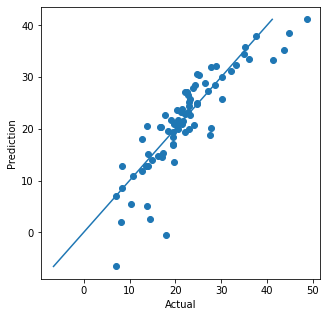

In [22]:
#Matplotlib is a library to plot the curves
#part of Data visualization

import matplotlib.pyplot as lt
lt.figure(figsize=(5,5))
lt.scatter(Y_test, y_test_predict)
lt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)])
lt.xlabel("Actual")
lt.ylabel("Prediction")